<a href="https://colab.research.google.com/github/tiwanaam/mlforhealthdata/blob/main/Datathon4_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
# Some may be imported later on as needed

#Import libraries - Basic
from google.colab import files
import io #import direct
import os
import numpy as np
import pandas as pd

#Import Libraries - Data Visualization
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

**Upload Data**

In [ ]:
# Upload the file
uploaded = files.upload()

Saving datathon4.csv to datathon4.csv


In [ ]:
# Read the dataset into a Pandas DataFrame
data = pd.read_csv(io.BytesIO(uploaded['datathon4.csv']))

In [ ]:
# Display the first few rows of the dataset to ensure it's loaded correctly
pd.set_option('display.max_columns', None)
data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

**Data Processing**

In [ ]:
# Only keep observations where hepatic_failure is equal to 1
data = data[data['hepatic_failure'] == 1]

In [ ]:
# Specifying the columns to keep
KeepList = [
    "hospital_death", "age", "bmi", "elective_surgery", "gender", "height", "pre_icu_los_days",
    "weight", "albumin_apache", "apache_post_operative", "arf_apache", "d1_inr_max",
    "bilirubin_apache", "bun_apache", "creatinine_apache", "fio2_apache", "gcs_eyes_apache",
    "gcs_motor_apache", "gcs_unable_apache", "gcs_verbal_apache", "glucose_apache",
    "heart_rate_apache", "hematocrit_apache", "intubated_apache", "map_apache", "paco2_apache",
    "paco2_for_ph_apache", "pao2_apache", "ph_apache", "resprate_apache", "sodium_apache",
    "temp_apache", "urineoutput_apache", "ventilated_apache", "wbc_apache", "aids", "diabetes_mellitus"
    ]

# Keep only the specified columns in the DataFrame
data = data[KeepList]

In [ ]:
# Check the dimensions, N = 1,182
data.shape

(1182, 37)

In [ ]:
# Count the number of missing values (NaN or None) in each column of the 'data' DataFrame
pd.set_option('display.max_rows', None) #set max rows

missing_value_counts = data.isnull().sum()
missing_value_counts

# Calculate the percentage of missing values
total_values = len(data)
percentage_missing = (missing_value_counts / total_values) * 100
percentage_missing

hospital_death            0.000000
age                       0.846024
bmi                       3.130288
elective_surgery          0.000000
gender                    0.000000
height                    0.846024
pre_icu_los_days          0.000000
weight                    2.538071
albumin_apache           35.617597
apache_post_operative     0.000000
arf_apache                0.000000
d1_inr_max               39.932318
bilirubin_apache         39.170897
bun_apache               14.636210
creatinine_apache        14.890017
fio2_apache              78.595601
gcs_eyes_apache           1.099831
gcs_motor_apache          1.099831
gcs_unable_apache         0.338409
gcs_verbal_apache         1.099831
glucose_apache            7.783418
heart_rate_apache         0.253807
hematocrit_apache        12.521151
intubated_apache          0.000000
map_apache                0.338409
paco2_apache             78.595601
paco2_for_ph_apache      78.595601
pao2_apache              78.595601
ph_apache           

In [ ]:
# Dropping variables with more than 70% missingness
KeepList = [
    "hospital_death", "age", "bmi", "elective_surgery", "gender", "height", "pre_icu_los_days",
    "weight", "albumin_apache", "apache_post_operative", "arf_apache", "d1_inr_max",
    "bilirubin_apache", "bun_apache", "creatinine_apache", "gcs_eyes_apache",
    "gcs_motor_apache", "gcs_unable_apache", "gcs_verbal_apache", "glucose_apache",
    "heart_rate_apache", "hematocrit_apache", "intubated_apache", "map_apache", "resprate_apache", "sodium_apache",
    "temp_apache", "urineoutput_apache", "ventilated_apache", "wbc_apache", "aids", "diabetes_mellitus"
    ]

# Keep only the specified columns in the DataFrame
data = data[KeepList]

In [ ]:
# Check the dimensions, N = 1,182
data.shape

(1182, 32)

In [ ]:
# Summary statistics
description = data.describe()
description

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,albumin_apache,apache_post_operative,arf_apache,d1_inr_max,bilirubin_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,aids,diabetes_mellitus
count,1182.000000,1172.000000,1145.000000,1182.000000,1172.000000,1182.000000,1152.000000,761.000000,1182.000000,1182.000000,710.000000,719.000000,1009.000000,1006.000000,1169.000000,1169.000000,1178.00000,1169.000000,1090.000000,1179.000000,1034.000000,1182.000000,1178.000000,1175.000000,1012.000000,1151.000000,553.000000,1182.000000,970.000000,1182.000000,1182.000000
mean,0.181049,59.421502,29.048343,0.067682,170.627551,1.167752,84.650017,2.515375,0.083756,0.047377,2.050625,5.395563,33.276313,1.743917,3.355004,5.407186,0.00764,3.865697,148.295780,103.150127,27.214603,0.156514,72.846350,25.222553,136.884289,36.255126,1303.984794,0.304569,11.058567,0.001692,0.263959
std,0.385222,12.907732,7.741081,0.251306,10.327282,3.087557,23.902341,0.632008,0.277139,0.212535,1.032510,7.122004,23.844389,1.487585,1.008387,1.287512,0.08711,1.585982,85.754131,30.262188,6.557687,0.363496,38.233277,14.713796,6.691437,0.968729,1174.520924,0.460419,8.096178,0.041117,0.440964
min,0.000000,18.000000,14.844926,0.000000,137.200000,-0.090278,38.600000,1.200000,0.000000,0.000000,0.900000,0.200000,4.000000,0.300000,1.000000,1.000000,0.00000,1.000000,39.000000,30.000000,16.200000,0.000000,40.000000,4.000000,117.000000,32.100000,0.000000,0.000000,0.900000,0.000000,0.000000
25%,0.000000,51.000000,23.784329,0.000000,162.600000,0.030729,68.000000,2.100000,0.000000,0.000000,1.400000,1.200000,16.000000,0.800000,3.000000,5.000000,0.00000,3.000000,89.000000,91.000000,22.200000,0.000000,47.000000,11.000000,133.000000,36.000000,490.924800,0.000000,5.370000,0.000000,0.000000
50%,0.000000,59.000000,27.681483,0.000000,170.200000,0.129167,81.600000,2.400000,0.000000,0.000000,1.700000,2.700000,26.000000,1.230000,4.000000,6.000000,0.00000,5.000000,117.000000,107.000000,26.500000,0.000000,57.000000,28.000000,138.000000,36.400000,1001.289600,0.000000,8.705000,0.000000,0.000000
75%,0.000000,68.000000,32.603647,0.000000,177.800000,0.503819,98.625000,2.900000,0.000000,0.000000,2.400000,6.000000,44.000000,2.090000,4.000000,6.000000,0.00000,5.000000,187.750000,123.000000,31.100000,0.000000,73.000000,36.000000,141.000000,36.700000,1790.985600,1.000000,14.817500,0.000000,1.000000
max,1.000000,89.000000,67.814990,1.000000,195.590000,29.737500,186.000000,4.600000,1.000000,1.000000,7.756000,43.500000,127.000000,11.180000,4.000000,6.000000,1.00000,5.000000,598.700000,178.000000,51.400000,1.000000,200.000000,60.000000,158.000000,39.700000,8716.669632,1.000000,45.800000,1.000000,1.000000


In [ ]:
# Check the type of data
print(data.dtypes)

hospital_death             int64
age                      float64
bmi                      float64
elective_surgery           int64
gender                    object
height                   float64
pre_icu_los_days         float64
weight                   float64
albumin_apache           float64
apache_post_operative      int64
arf_apache               float64
d1_inr_max               float64
bilirubin_apache         float64
bun_apache               float64
creatinine_apache        float64
gcs_eyes_apache          float64
gcs_motor_apache         float64
gcs_unable_apache        float64
gcs_verbal_apache        float64
glucose_apache           float64
heart_rate_apache        float64
hematocrit_apache        float64
intubated_apache         float64
map_apache               float64
resprate_apache          float64
sodium_apache            float64
temp_apache              float64
urineoutput_apache       float64
ventilated_apache        float64
wbc_apache               float64
aids      

In [ ]:
counts = data['hospital_death'].value_counts()

# Define your color sequence
colors = ['#0d7b94', '#ffd343']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of hospital_death',
    color_discrete_sequence=colors  # apply your colors here
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Death Status'
    ),
    title=dict(
        text='Distribution of hospital_death',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

In [ ]:
counts = data['gender'].value_counts()

# Define your color sequence
colors = ['#0d7b94', '#ffd343']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of gender',
    color_discrete_sequence=colors  # apply your colors here
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Gender Status'
    ),
    title=dict(
        text='Distribution of gender',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

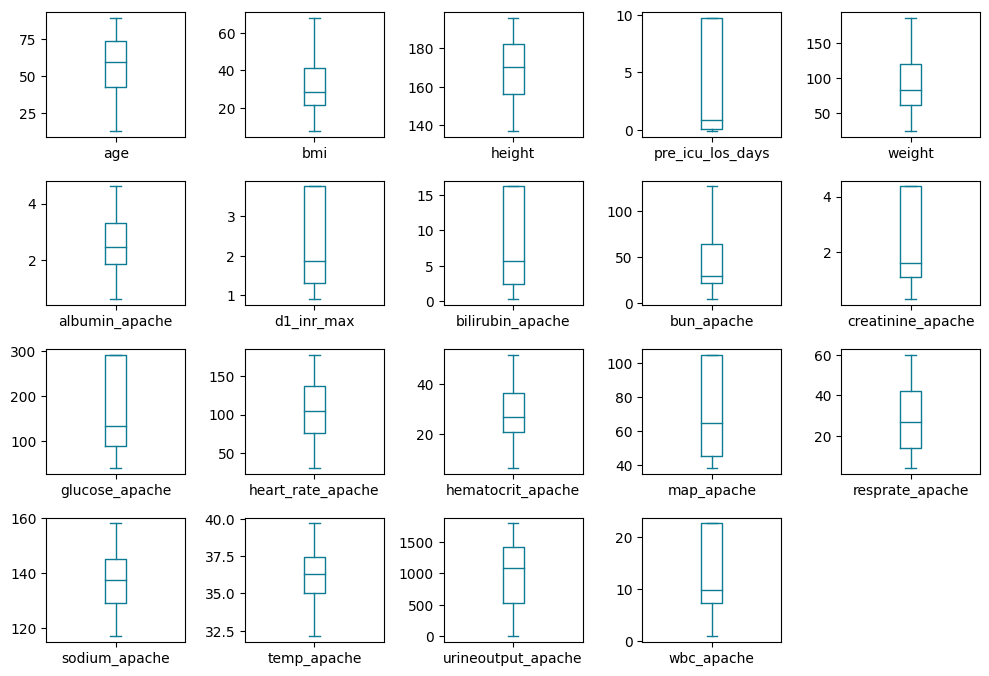

In [ ]:
# Specify the continuous variables to include
continuous_variables = [
    "age", "bmi", "height", "pre_icu_los_days",
    "weight", "albumin_apache", "d1_inr_max",
    "bilirubin_apache", "bun_apache", "creatinine_apache", "glucose_apache",
    "heart_rate_apache", "hematocrit_apache", "map_apache",
    "resprate_apache", "sodium_apache",
    "temp_apache", "urineoutput_apache", "wbc_apache"]

# Plot boxplots
description[continuous_variables].plot(kind='box', subplots=True, layout=(6,5), figsize=(10, 10), color='#0d7b94', sym='')
plt.tight_layout()
plt.show()

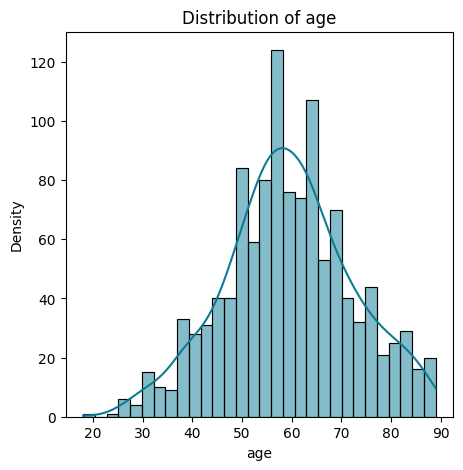

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

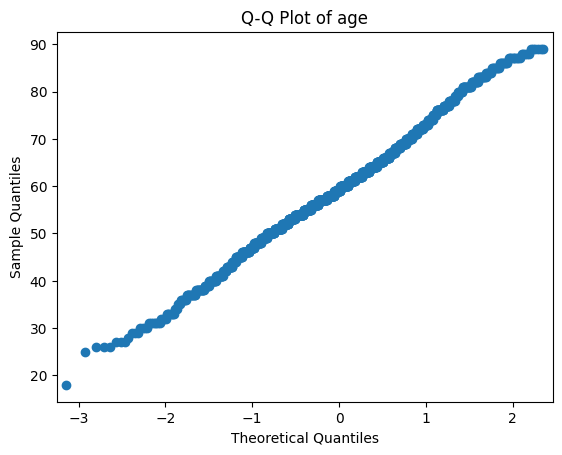

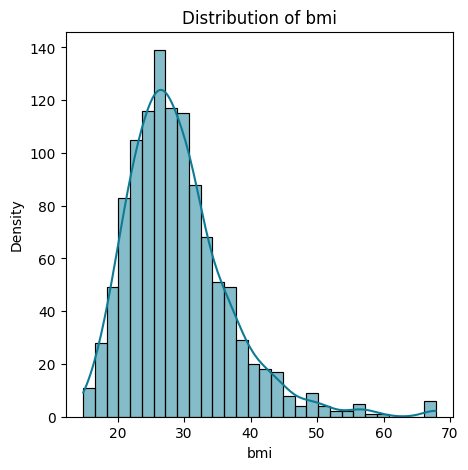

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

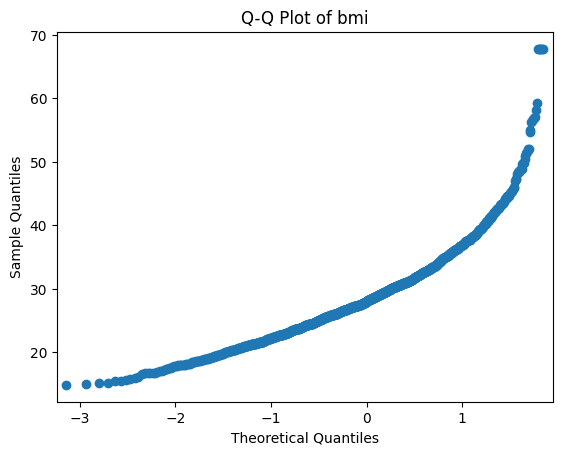

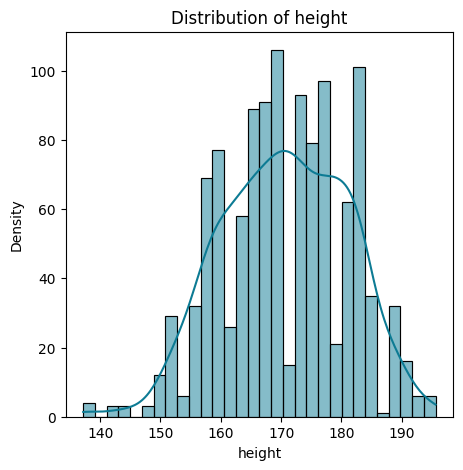

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

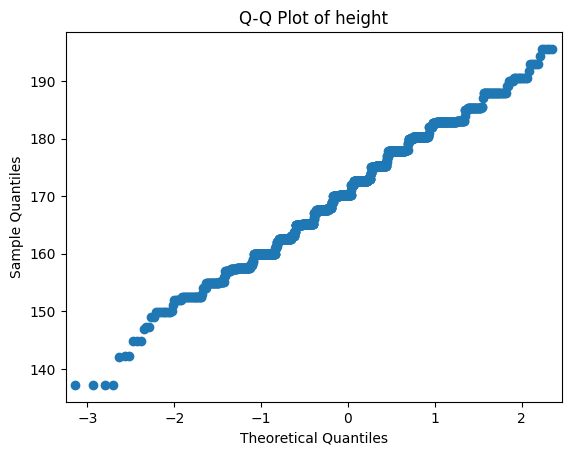

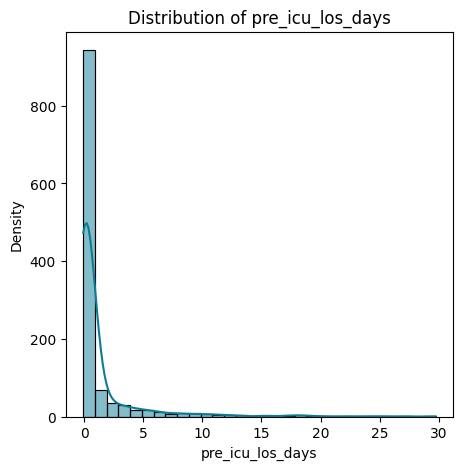

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

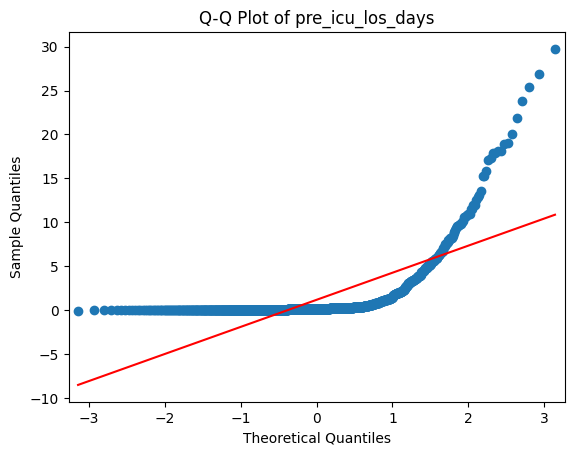

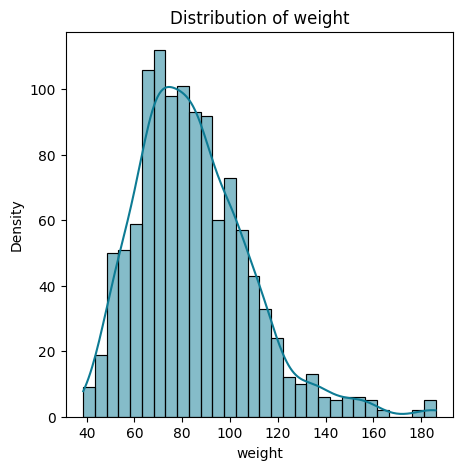

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

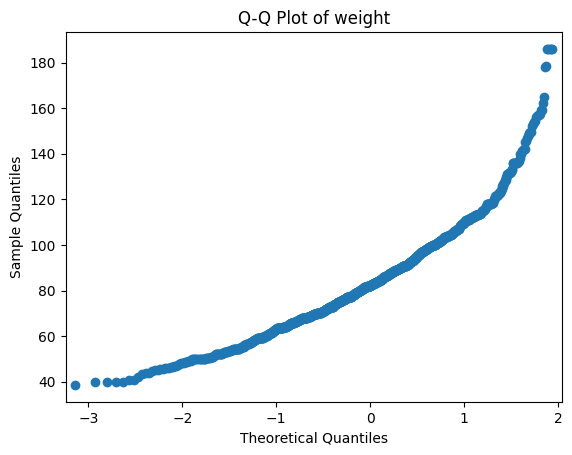

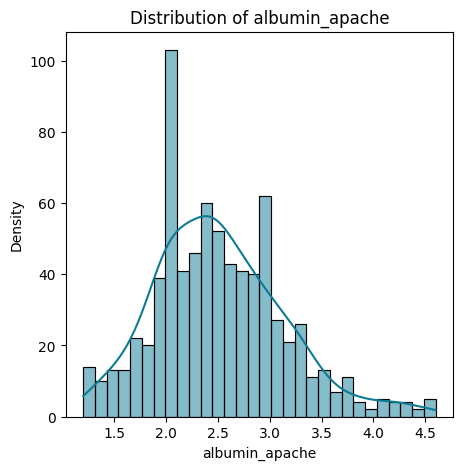

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

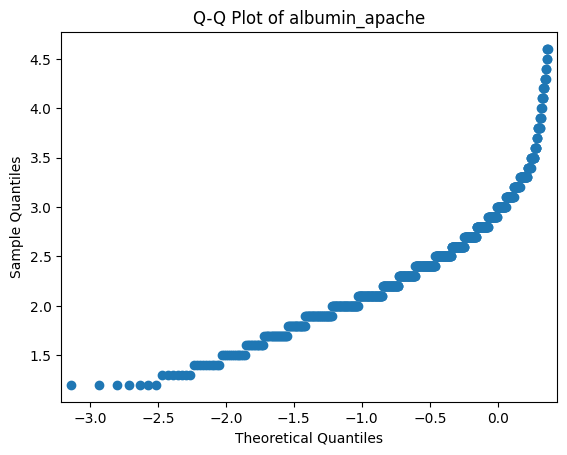

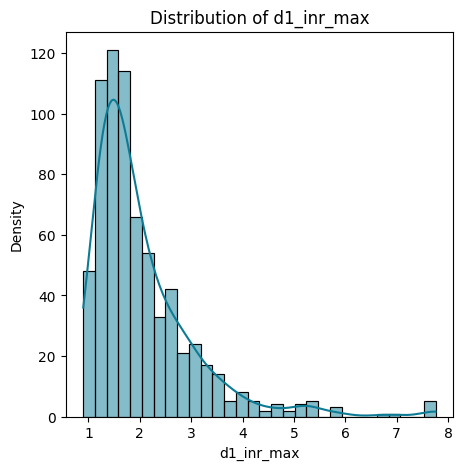

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

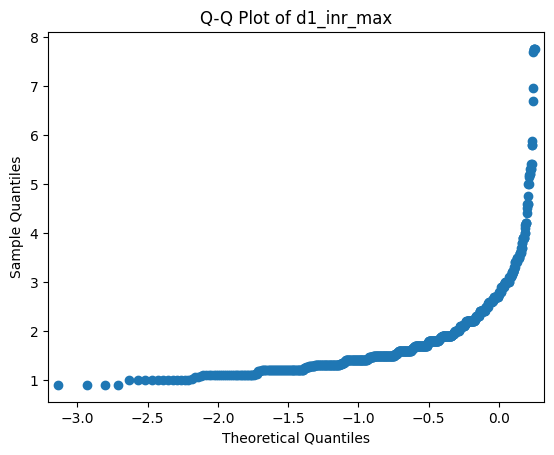

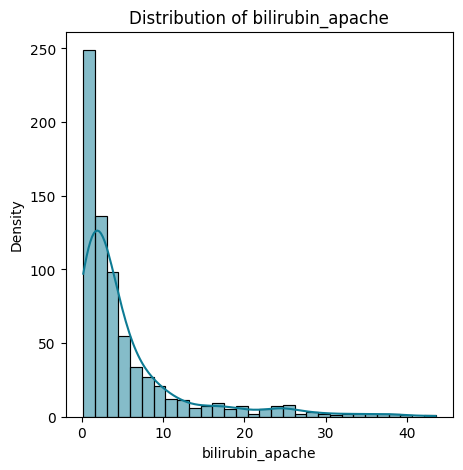

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

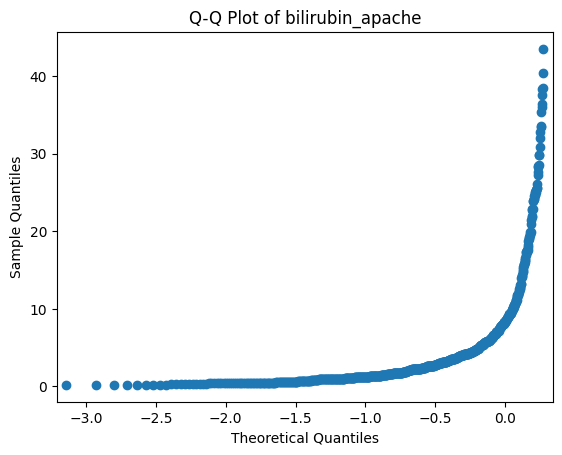

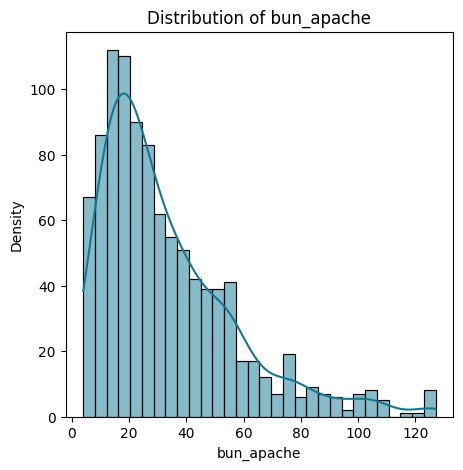

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

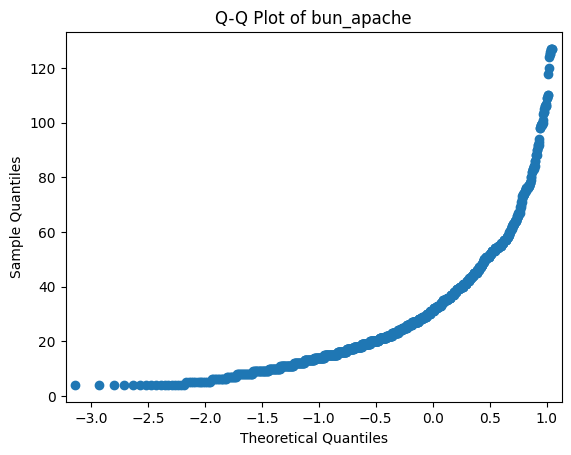

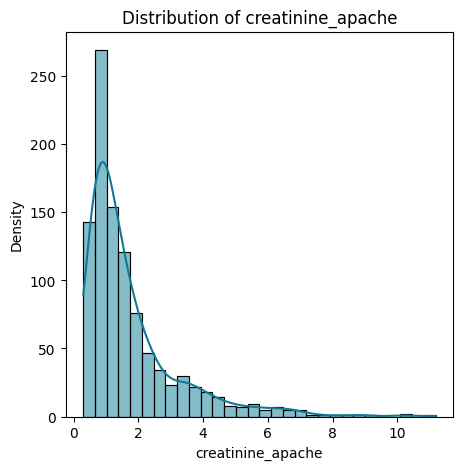

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

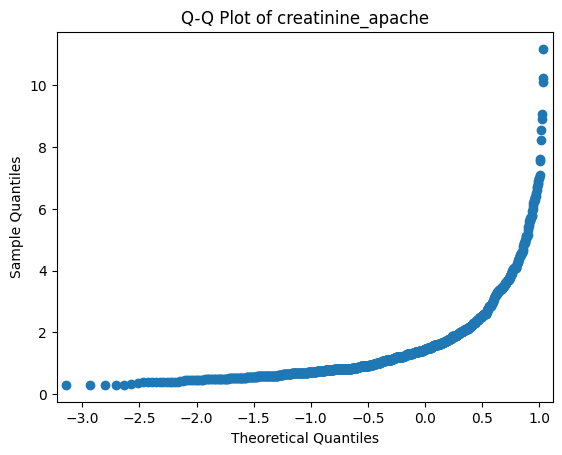

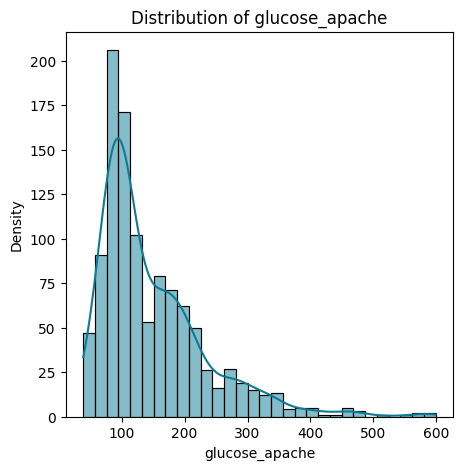

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

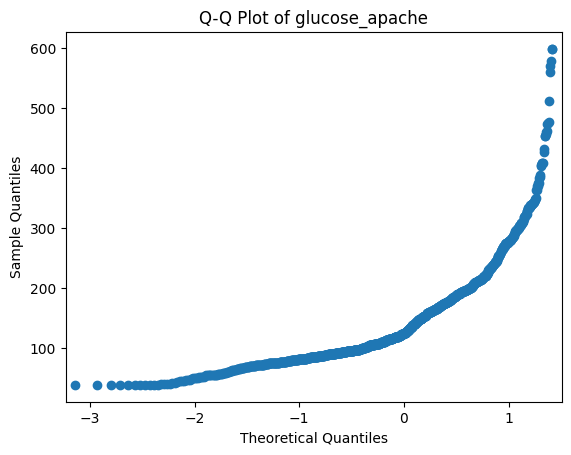

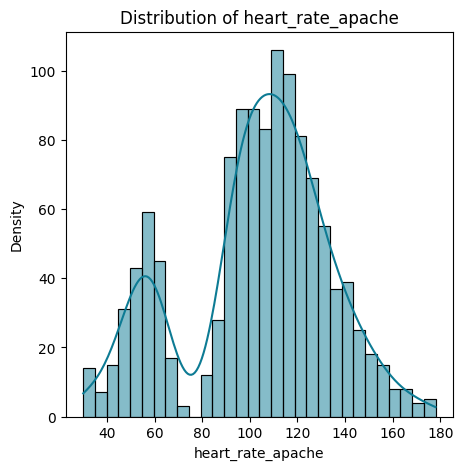

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

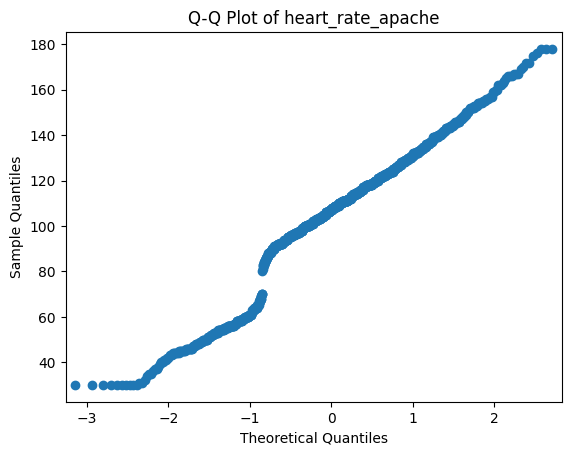

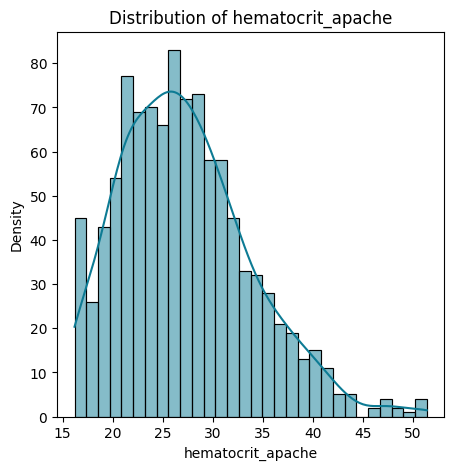

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

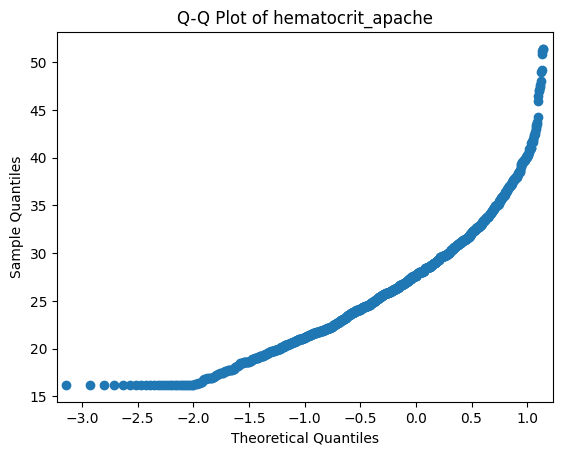

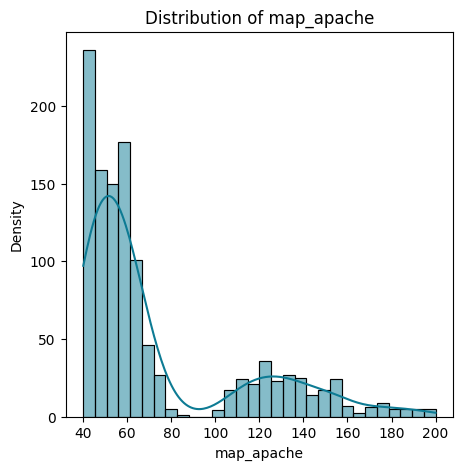

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

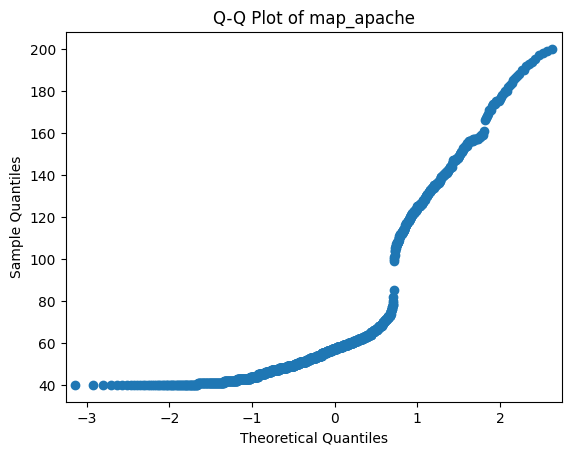

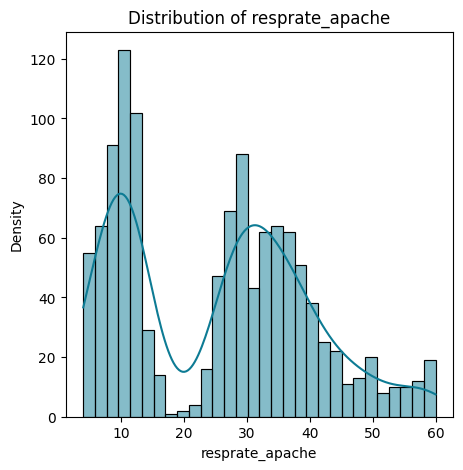

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

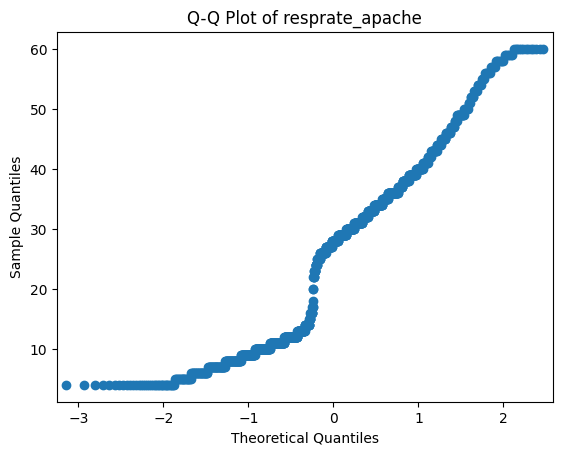

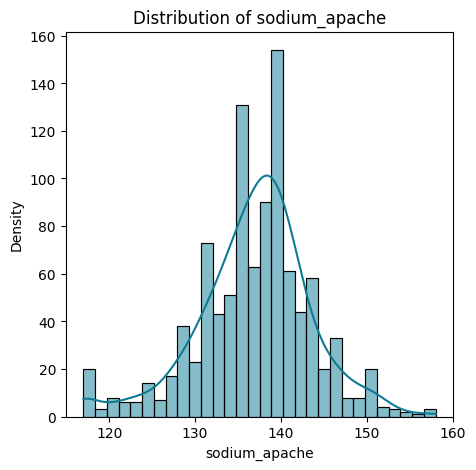

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

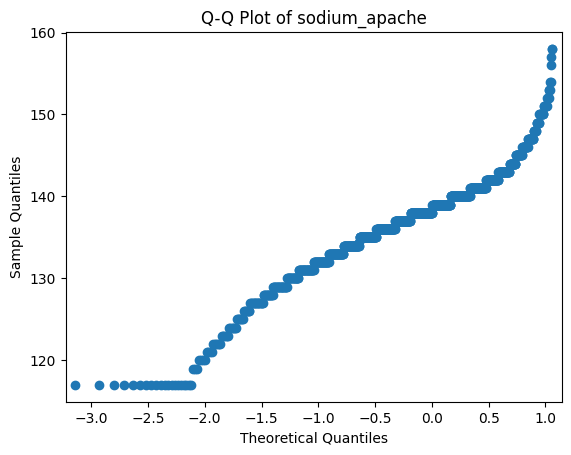

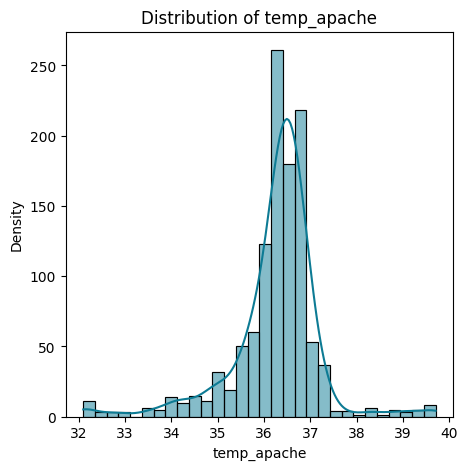

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

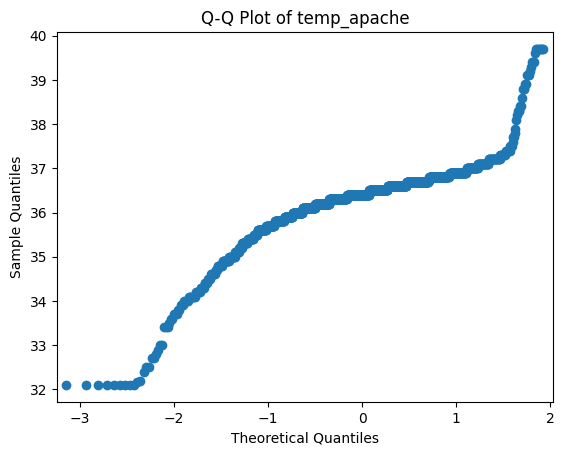

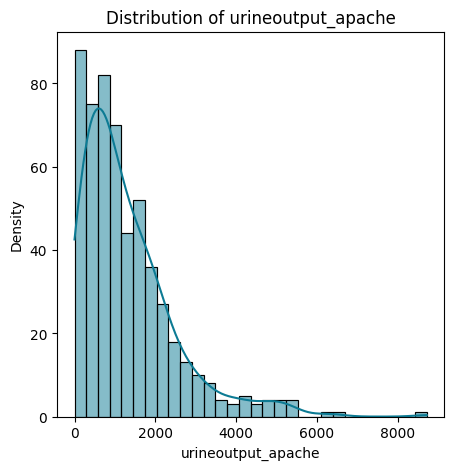

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

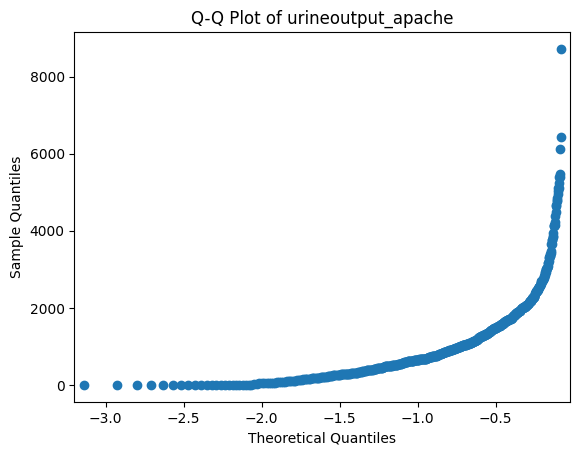

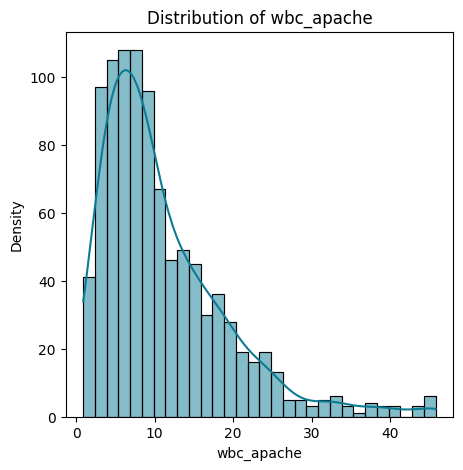

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 500x500 with 0 Axes>

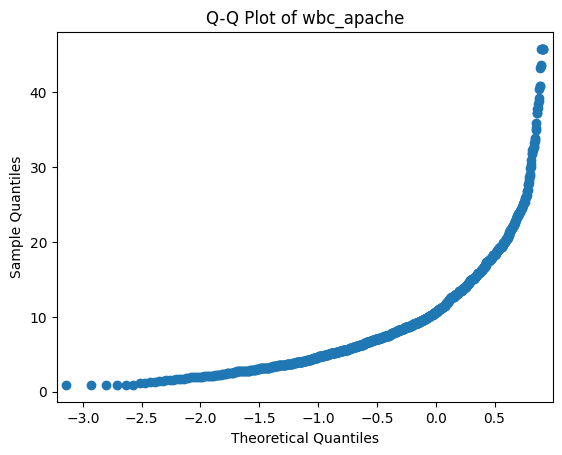

In [ ]:
for variable in continuous_variables:
    # Create a new figure for each variable
    plt.figure(figsize=(5, 5))

    # Histogram with a smoothed line (kernel density estimate)
    sns.histplot(data[variable], bins=30, kde=True, color='#0d7b94')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(5, 5))
    sm.qqplot(data[variable], line='s', color='#0d7b94')
    plt.title(f'Q-Q Plot of {variable}')
    plt.show()

**Feature Selection**

In [ ]:
# Map the descriptive categories in 'gender' to integers and convert the column to integer data type
data['gender'] = data['gender'].replace({'M' : 1, 'F' : 0}).astype(int)

In [ ]:
# Impute missing values with the mean of the column
data = data.fillna(data.mean())

data.isnull().sum()

hospital_death           0
age                      0
bmi                      0
elective_surgery         0
gender                   0
height                   0
pre_icu_los_days         0
weight                   0
albumin_apache           0
apache_post_operative    0
arf_apache               0
d1_inr_max               0
bilirubin_apache         0
bun_apache               0
creatinine_apache        0
gcs_eyes_apache          0
gcs_motor_apache         0
gcs_unable_apache        0
gcs_verbal_apache        0
glucose_apache           0
heart_rate_apache        0
hematocrit_apache        0
intubated_apache         0
map_apache               0
resprate_apache          0
sodium_apache            0
temp_apache              0
urineoutput_apache       0
ventilated_apache        0
wbc_apache               0
aids                     0
diabetes_mellitus        0
dtype: int64

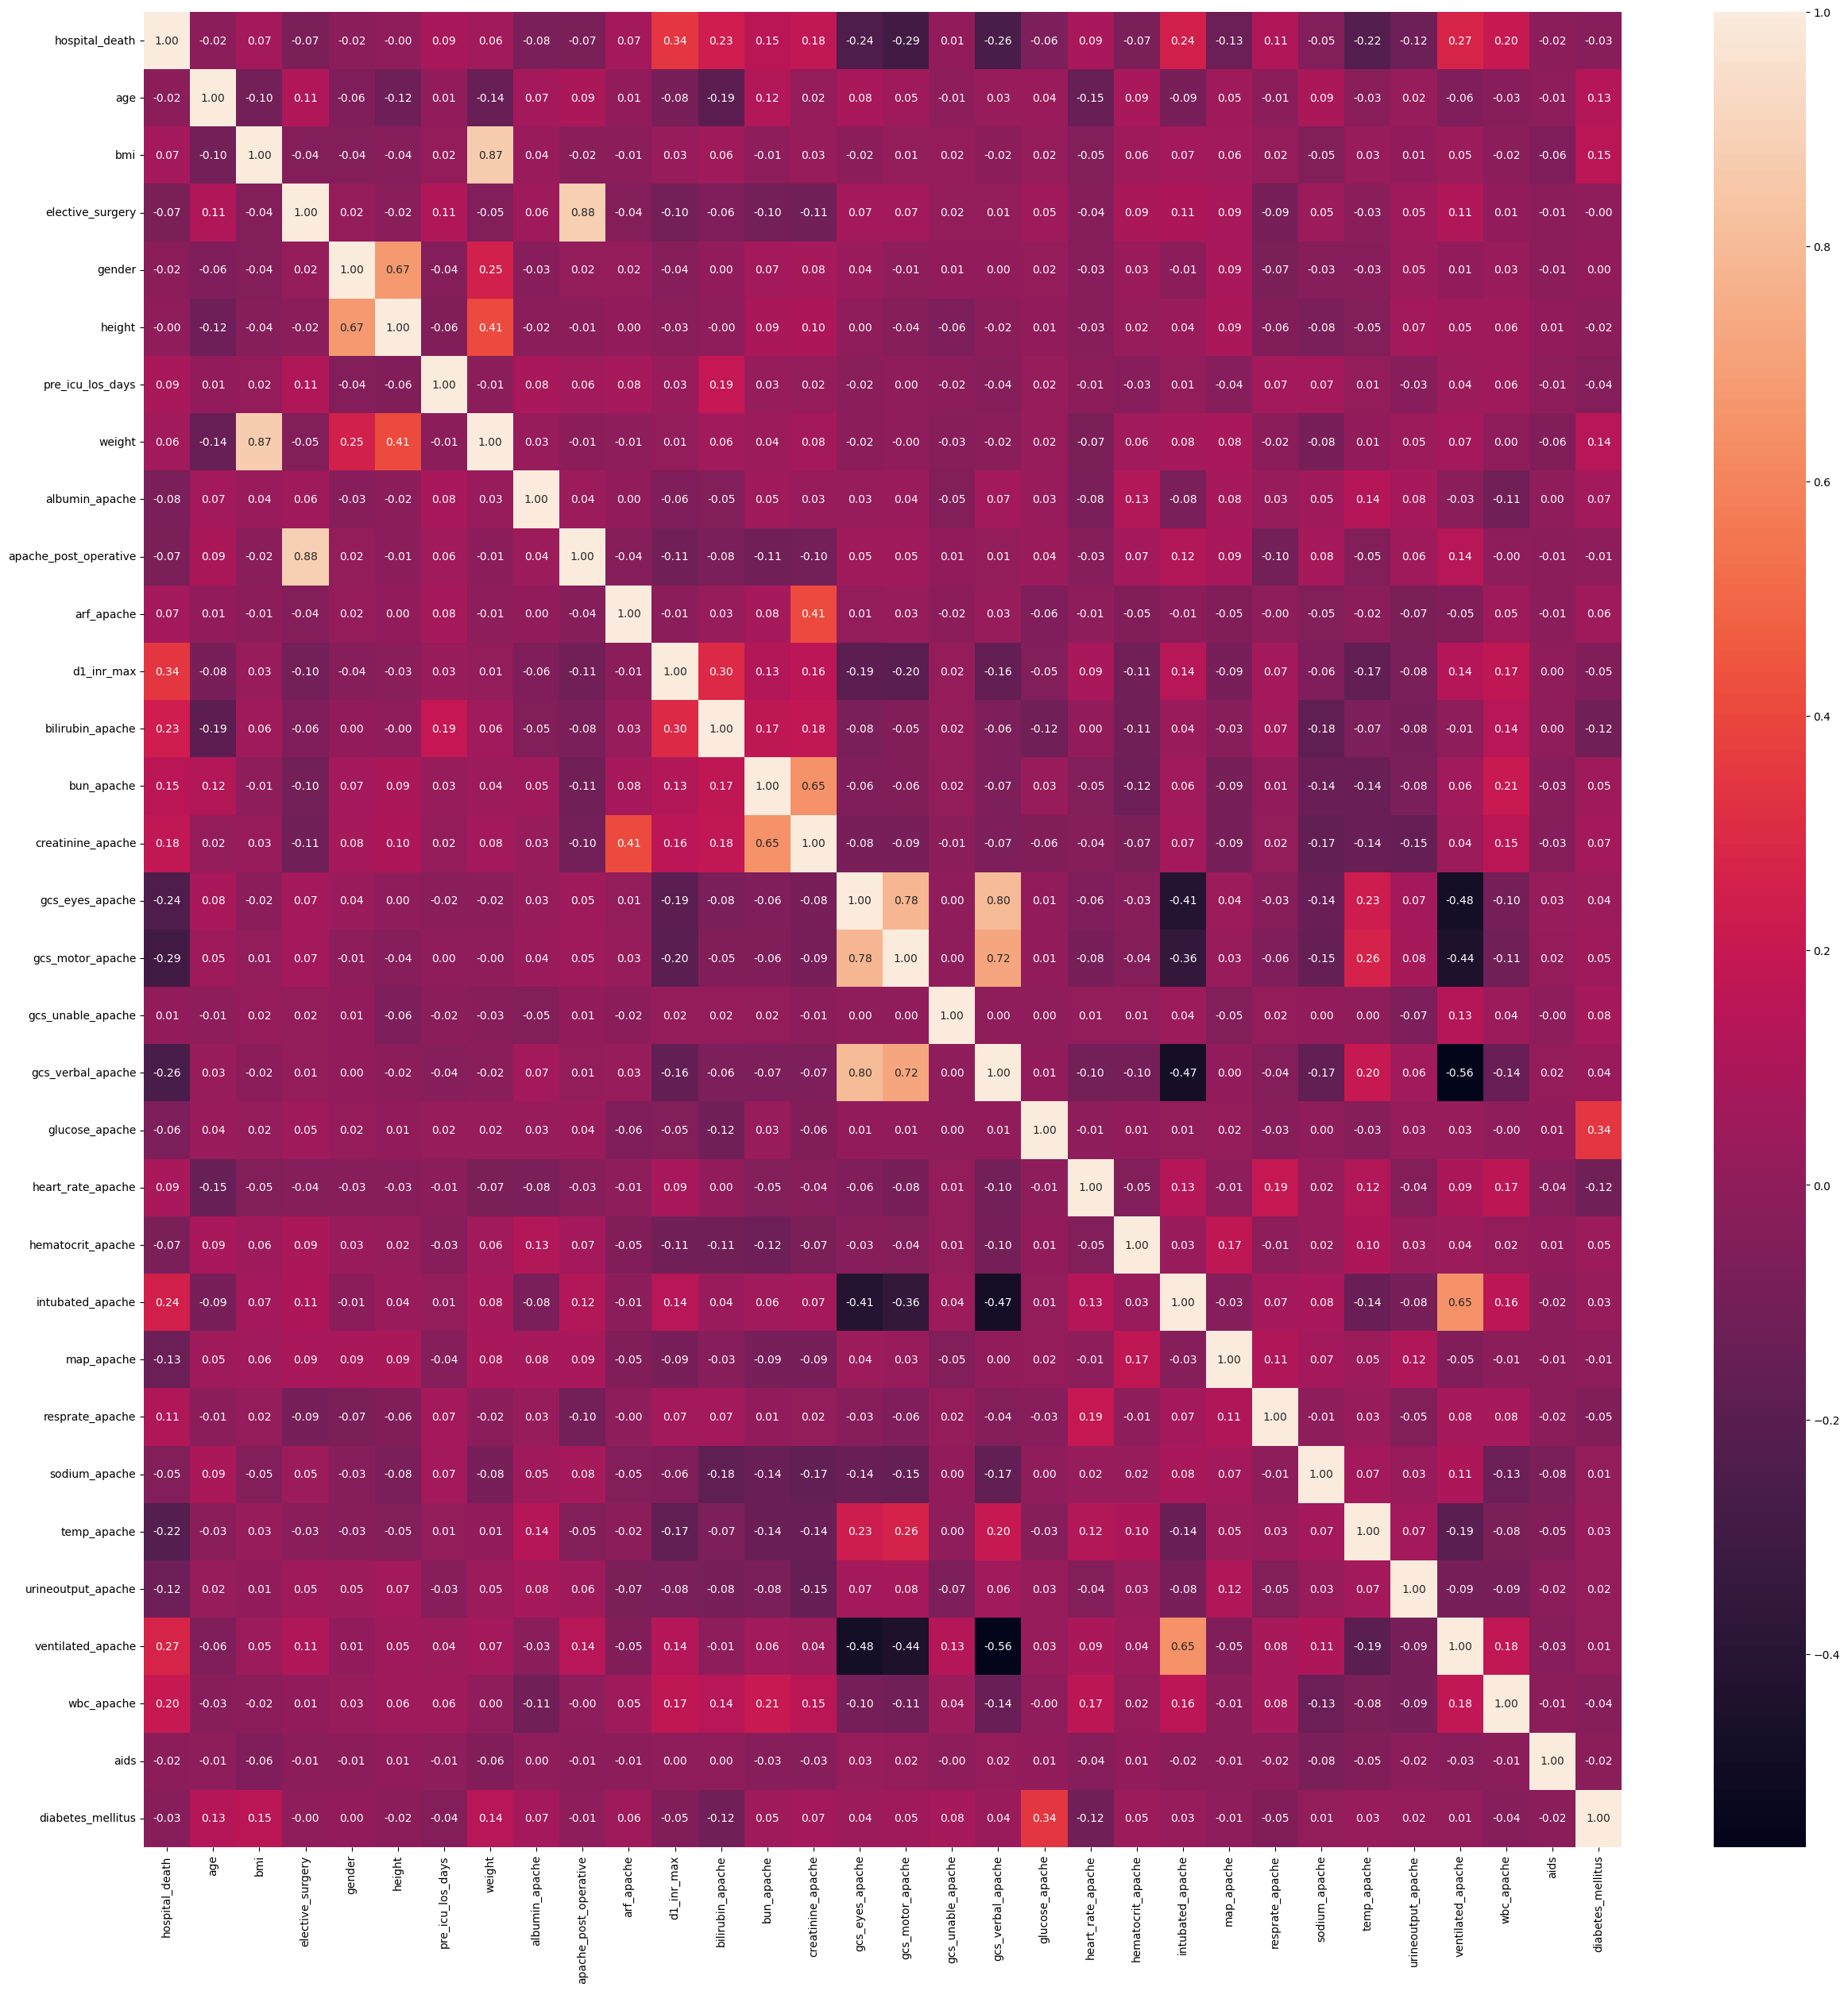

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [ ]:
# Select the top 10 features based on correlation
top_features_corr = corr_matrix['hospital_death'].abs().nlargest(10).index
print(top_features_corr)

Index(['hospital_death', 'd1_inr_max', 'gcs_motor_apache', 'ventilated_apache',
       'gcs_verbal_apache', 'intubated_apache', 'gcs_eyes_apache',
       'bilirubin_apache', 'temp_apache', 'wbc_apache'],
      dtype='object')


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso

# Fit the lasso regression model
X = data.drop(columns=['hospital_death'])
y = data[['hospital_death']]
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)

# Get the absolute coefficients and sort them in descending order
absolute_coeffs = np.abs(lasso.coef_)
sorted_indices = np.argsort(absolute_coeffs)[::-1]

# Select the top 10 features based on lasso regression
top_20_feature_indices = sorted_indices[:10]
top_features_lasso = X.columns[top_20_feature_indices]
print(top_features_lasso)

Index(['map_apache', 'bun_apache', 'glucose_apache', 'urineoutput_apache',
       'bmi', 'elective_surgery', 'gender', 'height', 'pre_icu_los_days',
       'creatinine_apache'],
      dtype='object')


**Model Development**

In [ ]:
# !pip install torch

# importing torch as t
import torch as t
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [ ]:
# Specifying the columns to keep
KeepList = [
    'hospital_death', 'd1_inr_max', 'gcs_motor_apache',
      'urineoutput_apache', 'bilirubin_apache', 'ventilated_apache',
       'gcs_verbal_apache', 'intubated_apache', 'gcs_eyes_apache',
       'temp_apache', 'glucose_apache', 'heart_rate_apache',
       'map_apache', 'weight', 'arf_apache',
       'apache_post_operative', 'albumin_apache', 'diabetes_mellitus'
    ]

# Keep only the specified columns in the DataFrame
data = data[KeepList]

In [ ]:
data.head()

,hospital_death,d1_inr_max,gcs_motor_apache,urineoutput_apache,bilirubin_apache,ventilated_apache,gcs_verbal_apache,intubated_apache,gcs_eyes_apache,temp_apache,glucose_apache,heart_rate_apache,map_apache,weight,arf_apache,apache_post_operative,albumin_apache,diabetes_mellitus
35,0,2.050625,5.0,1303.984794,5.395563,1.0,2.0,0.0,2.0,37.0,198.0,94.0,137.0,121.7,0.0,0,2.515375,1.0
49,0,1.100000,5.0,1303.984794,0.500000,1.0,4.0,0.0,3.0,36.2,147.0,110.0,64.0,90.7,0.0,0,2.300000,1.0
103,0,2.050625,6.0,1303.984794,0.300000,0.0,5.0,0.0,4.0,36.7,181.0,145.0,70.0,89.8,0.0,0,2.600000,1.0
113,0,1.400000,6.0,1303.984794,1.800000,0.0,5.0,0.0,4.0,36.6,159.0,140.0,57.0,79.8,0.0,0,2.000000,0.0
138,0,2.050625,1.0,1303.984794,2.100000,1.0,1.0,1.0,1.0,36.0,108.0,110.0,61.0,70.3,0.0,0,2.900000,0.0


In [ ]:
# checking the data types
data.dtypes

hospital_death             int64
d1_inr_max               float64
gcs_motor_apache         float64
urineoutput_apache       float64
bilirubin_apache         float64
ventilated_apache        float64
gcs_verbal_apache        float64
intubated_apache         float64
gcs_eyes_apache          float64
temp_apache              float64
glucose_apache           float64
heart_rate_apache        float64
map_apache               float64
weight                   float64
arf_apache               float64
apache_post_operative      int64
albumin_apache           float64
diabetes_mellitus        float64
dtype: object

In [ ]:
data.columns

Index(['hospital_death', 'd1_inr_max', 'gcs_motor_apache',
       'urineoutput_apache', 'bilirubin_apache', 'ventilated_apache',
       'gcs_verbal_apache', 'intubated_apache', 'gcs_eyes_apache',
       'temp_apache', 'glucose_apache', 'heart_rate_apache', 'map_apache',
       'weight', 'arf_apache', 'apache_post_operative', 'albumin_apache',
       'diabetes_mellitus'],
      dtype='object')

In [ ]:
data['hospital_death'].mean()

0.18104906937394247

In [ ]:
# Randomly sample 70% of the data for training
train_data = data.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_data = data.drop(train_data.index)

# Check the mean of the 'hospital_death' column in both training and testing data
train_data['hospital_death'].mean()
test_data['hospital_death'].mean()

# Data Preparation

# Extract the 'hospital_death' column as the target variable for training and testing
Y_train = train_data['hospital_death'].to_numpy()
Y_test = test_data['hospital_death'].to_numpy()

# Extract the features (excluding 'hospital_death') for training and testing
X_train = train_data.drop('hospital_death', axis=1).to_numpy()
X_test = test_data.drop('hospital_death', axis=1).to_numpy()

# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 3
hidden_units_layer_2 = 3

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((17, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out

In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 2000
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Text(0, 0.5, 'loss')

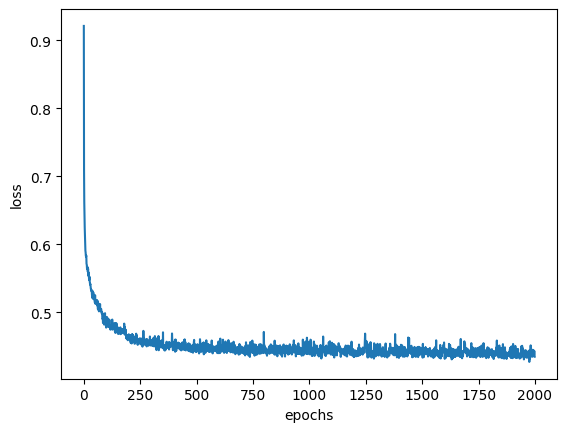

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

**Model Performance Evaluation using Validation**

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())


0.6628936529159546
0.43154391646385193


**Regularized Training**

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Regularization
# Deep neural networks are prone to overfitting if there is not much data available during training.

# Define hyperparameters
number_of_input_features = 17
number_of_hidden_units = 3
epochs = 100
learning_rate = 0.01
batch_size = 30
landa = 0.01  # Regularization term (lambda)

# Prepare the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model with regularization
model = nn.Sequential(
    nn.Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    nn.Tanh(),  # Tanh activation function
    nn.Linear(number_of_hidden_units, 1),  # Another linear layer
    nn.Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function with Binary Cross-Entropy Loss
loss_fn = nn.BCELoss()

# Lists to store training accuracy, validation accuracy, and training loss over epochs
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Adding regularization term for all parameters in the model
        l2_term = sum([(w ** 2).sum() for w in model.parameters()])

        # New loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y) + landa * l2_term

        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}, Validation Accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

Epoch 0/100 ---> Train Accuracy: 0.7170370221138, Validation Accuracy: 0.7352112531661987
Epoch 1/100 ---> Train Accuracy: 0.7229629755020142, Validation Accuracy: 0.7492957711219788
Epoch 2/100 ---> Train Accuracy: 0.7207407355308533, Validation Accuracy: 0.7549296021461487
Epoch 3/100 ---> Train Accuracy: 0.7288888692855835, Validation Accuracy: 0.7661972045898438
Epoch 4/100 ---> Train Accuracy: 0.7192592620849609, Validation Accuracy: 0.7521126866340637
Epoch 5/100 ---> Train Accuracy: 0.7288888692855835, Validation Accuracy: 0.7577464580535889
Epoch 6/100 ---> Train Accuracy: 0.7148148417472839, Validation Accuracy: 0.7661972045898438
Epoch 7/100 ---> Train Accuracy: 0.7266666889190674, Validation Accuracy: 0.7549296021461487
Epoch 8/100 ---> Train Accuracy: 0.7303703427314758, Validation Accuracy: 0.7492957711219788
Epoch 9/100 ---> Train Accuracy: 0.7281481623649597, Validation Accuracy: 0.7521126866340637
Epoch 10/100 ---> Train Accuracy: 0.7251851558685303, Validation Accuracy

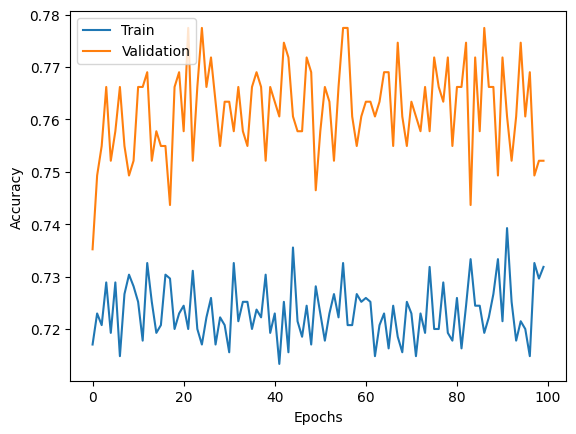

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

**Dropout**

In [ ]:
number_of_input_features = 17  # Number of input features in the dataset

# Reduced number of hidden units to 5 and just using 1 hidden layer
number_of_hidden_units = 3  # Number of hidden units in the neural network
epochs = 1000  # Number of training epochs
learning_rate = 0.01  # Learning rate for the optimizer
batch_size = 32  # Number of samples in each training batch
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer

# Convert training and testing data to PyTorch tensors
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)
X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

# Create a training dataset and data loader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    Tanh(),  # Add Tanh activation function
    Dropout(dropout_probablity),  # Dropout layer to prevent overfitting
    Linear(number_of_hidden_units, 1),  # Another linear layer
    Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy

# Training loop
for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Calculate the loss
        loss = loss_fn(probs.view(-1), Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradients and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy: {train_accuracy}, validation_accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/1000 ---> train_accuracy: 0.6925926208496094, validation_accuracy: 0.7492957711219788
epoch 1/1000 ---> train_accuracy: 0.7177777886390686, validation_accuracy: 0.7577464580535889
epoch 2/1000 ---> train_accuracy: 0.7251851558685303, validation_accuracy: 0.7661972045898438
epoch 3/1000 ---> train_accuracy: 0.7333333492279053, validation_accuracy: 0.7464788556098938
epoch 4/1000 ---> train_accuracy: 0.7229629755020142, validation_accuracy: 0.7605633735656738
epoch 5/1000 ---> train_accuracy: 0.7362962961196899, validation_accuracy: 0.7549296021461487
epoch 6/1000 ---> train_accuracy: 0.7237036824226379, validation_accuracy: 0.7605633735656738
epoch 7/1000 ---> train_accuracy: 0.729629635810852, validation_accuracy: 0.7464788556098938
epoch 8/1000 ---> train_accuracy: 0.7318518757820129, validation_accuracy: 0.7549296021461487
epoch 9/1000 ---> train_accuracy: 0.7377777695655823, validation_accuracy: 0.7577464580535889
epoch 10/1000 ---> train_accuracy: 0.7400000095367432, valida

Text(0, 0.5, 'accuracy')

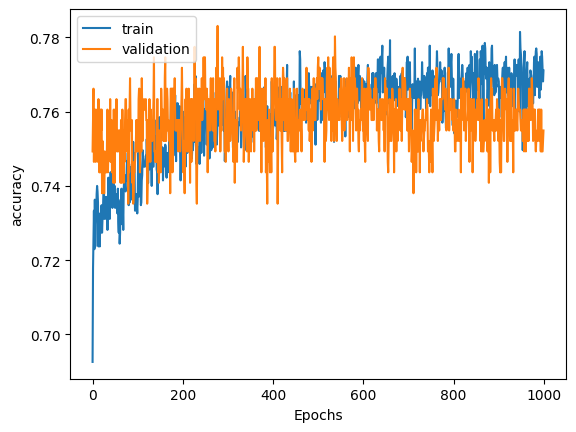

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('accuracy')

**Early Stopping**

In [ ]:
# Importing necessary libraries
import torch as t
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Sequential, Linear, Tanh, Sigmoid
from torch.optim import Adam
from torch.nn import BCELoss
import matplotlib.pyplot as plt

# Defining the parameters
number_of_input_features = 17
number_of_hidden_units = 3
epochs = 1000
learning_rate = 0.01
batch_size = 32

# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creating a neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),
    Tanh(),
    Linear(number_of_hidden_units, 1),
    Sigmoid()
)

# Setting up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = BCELoss()

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)

        # new loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y)

        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs > .5).type(t.LongTensor).view(-1)

        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

epoch 0/1000 ---> train_accuracy : 0.7066666483879089 , validation_accuracy : 0.7380281686782837
epoch 1/1000 ---> train_accuracy : 0.729629635810852 , validation_accuracy : 0.7521126866340637
epoch 2/1000 ---> train_accuracy : 0.7362962961196899 , validation_accuracy : 0.7605633735656738
epoch 3/1000 ---> train_accuracy : 0.7266666889190674 , validation_accuracy : 0.7577464580535889
epoch 4/1000 ---> train_accuracy : 0.7511110901832581 , validation_accuracy : 0.7577464580535889
epoch 5/1000 ---> train_accuracy : 0.7414814829826355 , validation_accuracy : 0.7549296021461487
epoch 6/1000 ---> train_accuracy : 0.7444444298744202 , validation_accuracy : 0.7577464580535889
epoch 7/1000 ---> train_accuracy : 0.7414814829826355 , validation_accuracy : 0.7267605662345886
epoch 8/1000 ---> train_accuracy : 0.7607407569885254 , validation_accuracy : 0.7577464580535889
epoch 9/1000 ---> train_accuracy : 0.7607407569885254 , validation_accuracy : 0.7492957711219788
epoch 10/1000 ---> train_accura

Text(0, 0.5, 'Accuracy')

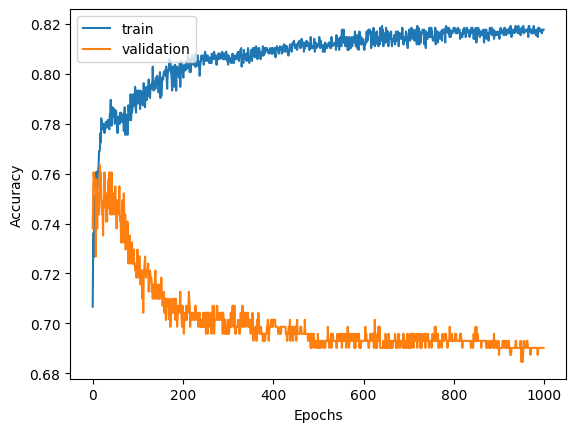

In [ ]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')